In [1]:
import zmq

# Create a ZeroMQ context
context = zmq.Context()

# Create a socket to communicate with the server
socket = context.socket(zmq.REQ)
server_ip = "10.203.232.86"
server_port = "5555"  # Make sure this matches the server's port
server_address = f"tcp://{server_ip}:{server_port}"

# Connect to the server
socket.connect(server_address)

# Send a string message to the server
message = "Hello, Server!"
print(f"Sending message to server: {message}")
socket.send_string(message)

# Wait for a reply from the server
reply = socket.recv_string()
print(f"Received reply from server: {reply}")

# Clean up
socket.close()
context.term()

Sending message to server: Hello, Server!
Received reply from server: Response from server


In [5]:
import numpy as np
import zmq

# Create a ZeroMQ context
context = zmq.Context()

# Create a socket to subscribe to the broadcast
socket = context.socket(zmq.SUB)
broadcast_ip = "10.203.232.86"
broadcast_port = "5588"  # Make sure this matches the broadcaster's port
broadcast_address = f"tcp://{broadcast_ip}:{broadcast_port}"

# Connect to the broadcast
socket.connect(broadcast_address)

# Subscribe to all messages
socket.setsockopt_string(zmq.SUBSCRIBE, '')

print("Listening for broadcast messages...")

try:
    while True:
        # Receive the message
        message = socket.recv()
        # Deserialize the numpy array
        array = np.frombuffer(message)
        print(f"Received array: {array}")
except KeyboardInterrupt:
    print("Stopped listening.")

# Clean up
socket.close()
context.term()

Listening for broadcast messages...


ValueError: buffer size must be a multiple of element size

In [6]:
import open3d as o3d
import numpy as np
import time 
# from scipy.spatial.transform import Rotation as R 

# create a pyramid mesh representing a camera
vertices = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0.5, 0.5, 1]])
triangles = np.array([[0, 1, 2], [0, 2, 3], [0, 1, 4], [1, 2, 4], [2, 3, 4], [3, 0, 4]])
camera_1 = o3d.geometry.TriangleMesh()
camera_1.vertices = o3d.utility.Vector3dVector(vertices)
camera_1.triangles = o3d.utility.Vector3iVector(triangles)

# create a second camera mesh
camera_2 = o3d.geometry.TriangleMesh()
camera_2.vertices = o3d.utility.Vector3dVector(vertices + np.array([2, 0, 0]))
camera_2.triangles = o3d.utility.Vector3iVector(triangles)
camera_2.paint_uniform_color([0.1, 0.1, 0.7])

# # create a third camera mesh
camera_3 = o3d.geometry.TriangleMesh()
camera_3.vertices = o3d.utility.Vector3dVector(vertices + np.array([4, 0, 0]))
camera_3.triangles = o3d.utility.Vector3iVector(triangles)
R = camera_3.get_rotation_matrix_from_xyz((0, 0, np.pi / 2))
camera_3.rotate(R, center=(0.5, 0.5, 0.5))

# create a coordinate axis
coord = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.6, origin=[0, 1, 0])



# visualize the mesh
o3dviz = o3d.visualization.Visualizer()
o3dviz.create_window()
render_option = o3dviz.get_render_option()
render_option.mesh_show_back_face = True
render_option.mesh_show_wireframe = True
o3dviz.add_geometry(camera_1)
o3dviz.add_geometry(camera_2)
o3dviz.add_geometry(camera_3)
o3dviz.add_geometry(coord)



start_time = time.time()
frame_count = 0

try:
    while True:
        
    # changing the position and orientation of the mesh
        camera_1.vertices = o3d.utility.Vector3dVector(vertices + np.random.randn(5, 3) * 0.01)
        camera_1.triangles = o3d.utility.Vector3iVector(triangles)

        camera_2.vertices = o3d.utility.Vector3dVector(vertices + np.random.randn(5, 3) * 0.01 + np.array([2, 0, 0]))
        camera_2.triangles = o3d.utility.Vector3iVector(triangles)

        camera_3.vertices = o3d.utility.Vector3dVector(vertices + np.random.randn(5, 3) * 0.01 + np.array([4, 0, 0]))
        R = camera_3.get_rotation_matrix_from_xyz(np.random.randn(3) * 0.1)
        camera_3.rotate(R, center=(0.5, 0.5, 0.5))
        camera_3.triangles = o3d.utility.Vector3iVector(triangles)

        o3dviz.update_geometry(camera_1)
        o3dviz.update_geometry(camera_2)
        o3dviz.update_geometry(camera_3)
        o3dviz.poll_events()
        o3dviz.update_renderer()

        frame_count += 1
        elapsed_time = time.time() - start_time
        if elapsed_time > 0:
            fps = frame_count / elapsed_time
            print(f"FPS: {fps:.2f}")


except KeyboardInterrupt:
    print("Stopped visualization.")
    o3dviz.destroy_window()


FPS: 50.01
FPS: 56.37
FPS: 56.01
FPS: 46.02
FPS: 48.83
FPS: 50.18
FPS: 51.06
FPS: 52.11
FPS: 52.55
FPS: 53.13
FPS: 53.66
FPS: 54.14
FPS: 54.62
FPS: 54.97
FPS: 55.09
FPS: 55.58
FPS: 55.71
FPS: 55.96
FPS: 56.18
FPS: 56.35
FPS: 56.70
FPS: 56.84
FPS: 57.00
FPS: 57.11
FPS: 57.22
FPS: 57.33
FPS: 57.42
FPS: 57.42
FPS: 57.49
FPS: 57.66
FPS: 57.76
FPS: 57.84
FPS: 57.85
FPS: 57.98
FPS: 58.02
FPS: 58.07
FPS: 58.11
FPS: 58.14
FPS: 58.20
FPS: 58.23
FPS: 58.29
FPS: 58.27
FPS: 58.37
FPS: 58.39
FPS: 58.46
FPS: 58.49
FPS: 58.52
FPS: 58.55
FPS: 58.58
FPS: 58.60
FPS: 58.64
FPS: 58.66
FPS: 58.69
FPS: 58.71
FPS: 58.73
FPS: 58.75
FPS: 58.73
FPS: 58.77
FPS: 58.80
FPS: 58.83
FPS: 58.85
FPS: 58.87
FPS: 58.89
FPS: 58.90
FPS: 58.92
FPS: 58.94
FPS: 58.95
FPS: 58.97
FPS: 58.98
FPS: 59.00
FPS: 59.01
FPS: 58.99
FPS: 59.02
FPS: 59.04
FPS: 59.05
FPS: 59.07
FPS: 59.07
FPS: 59.06
FPS: 59.11
FPS: 59.12
FPS: 59.13
FPS: 59.14
FPS: 59.15
FPS: 59.16
FPS: 59.17
FPS: 59.18
FPS: 59.19
FPS: 59.20
FPS: 59.21
FPS: 59.22
FPS: 59.19

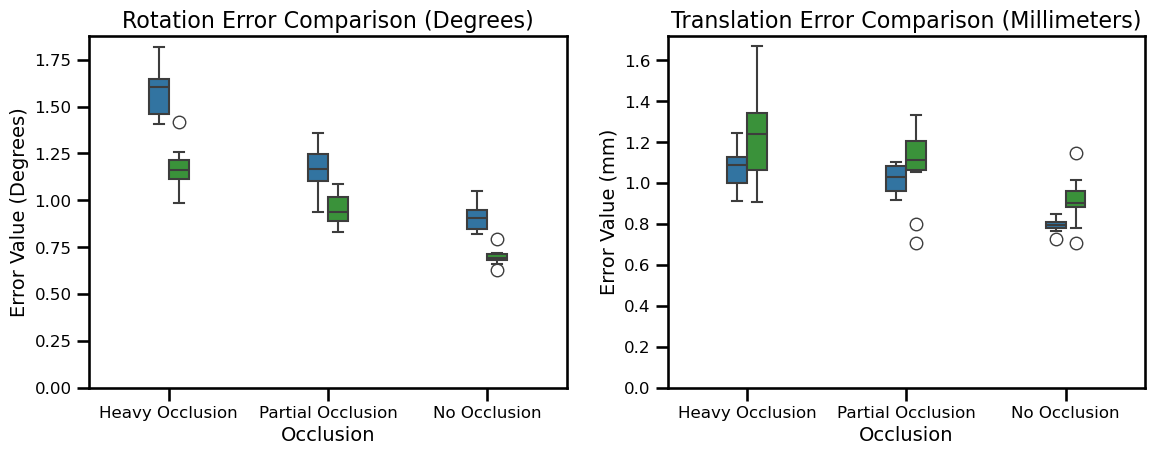

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Different means and variances for each occlusion condition
# For Kalman Filter (degrees for rotation, mm for translation)
means_kalman = {
    'Heavy Occlusion': {'rotation': 1.5, 'translation': 1.2},
    'Partial Occlusion': {'rotation': 1.2, 'translation': 1.0},
    'No Occlusion': {'rotation': 0.9, 'translation': 0.8}
}
stds_kalman = {
    'Heavy Occlusion': {'rotation': 0.2, 'translation': 0.15},
    'Partial Occlusion': {'rotation': 0.15, 'translation': 0.1},
    'No Occlusion': {'rotation': 0.1, 'translation': 0.05}
}

# For Spatio-temporal Transformer (degrees for rotation, mm for translation)
means_transformer = {
    'Heavy Occlusion': {'rotation': 1.2, 'translation': 1.3},
    'Partial Occlusion': {'rotation': 0.95, 'translation': 1.1},
    'No Occlusion': {'rotation': 0.7, 'translation': 0.9}
}
stds_transformer = {
    'Heavy Occlusion': {'rotation': 0.15, 'translation': 0.2},
    'Partial Occlusion': {'rotation': 0.1, 'translation': 0.15},
    'No Occlusion': {'rotation': 0.05, 'translation': 0.1}
}

# Generate synthetic data for different occlusion conditions
data = {'Error Type': [], 'Algorithm': [], 'Occlusion': [], 'Error Value': []}

# Function to generate errors based on the mean and std
def generate_errors(occlusion, algorithm, error_type, mean, std, size=10):
    data['Error Type'].extend([error_type] * size)
    data['Algorithm'].extend([algorithm] * size)
    data['Occlusion'].extend([occlusion] * size)
    errors = np.random.normal(loc=mean, scale=std, size=size)
    data['Error Value'].extend(errors)

# Generate data for Kalman filter and Transformer with different means/variances
for occlusion in ['Heavy Occlusion', 'Partial Occlusion', 'No Occlusion']:
    # Kalman Filter data
    generate_errors(occlusion, 'Kalman Filter', 'Rotation', means_kalman[occlusion]['rotation'], stds_kalman[occlusion]['rotation'])
    generate_errors(occlusion, 'Kalman Filter', 'Translation', means_kalman[occlusion]['translation'], stds_kalman[occlusion]['translation'])
    
    # Transformer data
    generate_errors(occlusion, 'Spatio-temporal Transformer', 'Rotation', means_transformer[occlusion]['rotation'], stds_transformer[occlusion]['rotation'])
    generate_errors(occlusion, 'Spatio-temporal Transformer', 'Translation', means_transformer[occlusion]['translation'], stds_transformer[occlusion]['translation'])

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Set the font size and plot context
sns.set_context("talk", font_scale=1.2)  # Increase the font size using sns.set_context
plt.rc('axes', titlesize=16)  # Title font size
plt.rc('axes', labelsize=14)  # Axis label font size
plt.rc('legend', fontsize=10)  # Legend font size
plt.rc('xtick', labelsize=12)  # X-axis tick font size
plt.rc('ytick', labelsize=12)  # Y-axis tick font size

# Create smaller subplots with gaps
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Make the canvas smaller

palette = {'Kalman Filter': '#1f77b4', 'Spatio-temporal Transformer': '#2ca02c'}

# Subplot 1: Rotation Errors
sns.boxplot(x='Occlusion', y='Error Value', hue='Algorithm', data=df[df['Error Type'] == 'Rotation'], ax=axs[0], 
            palette=palette, width=0.25, dodge=True, linewidth=1.5)
axs[0].set_title('Rotation Error Comparison (Degrees)')
axs[0].set_ylabel('Error Value (Degrees)')
axs[0].set_ylim(0, None)

# Subplot 2: Translation Errors
sns.boxplot(x='Occlusion', y='Error Value', hue='Algorithm', data=df[df['Error Type'] == 'Translation'], ax=axs[1], 
            palette=palette, width=0.25, dodge=True, linewidth=1.5)
axs[1].set_title('Translation Error Comparison (Millimeters)')
axs[1].set_ylabel('Error Value (mm)')
axs[1].set_ylim(0, None)

# Remove legends from both subplots
# axs[0].legend_.remove()
# axs[1].legend_.remove()

# Adjust layout for tight display
plt.tight_layout()

# Show the plot
plt.show()
